In [1]:
import requests, shutil, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def download_npy(url:str):

    # download data
    response = requests.get(url)
    if response.status_code == 200:
        # exists
        content = response.text
    else:
        # doesn't exist
        return

    # get name 
    lines = content.split("\n")
    teff = float(lines[1].split(" ")[3])
    logg = float(lines[2].split(" ")[3]) * 100.0
    out = "data/btsettl-cifist_%04d_%04d"%(teff,logg)
    if os.path.exists(out):
        os.remove(out)

    wl = []
    fl = []
    for i,l in enumerate(lines[9:]):
        s = l.split()
        if len(s) == 2:
            wl.append(float(s[0]))
            fl.append(float(s[1]))
        else:
            break

    # skip lines, to reduce file size
    pitch = 2
        
    # save data
    wl = np.array(wl[::pitch])*0.1   # convert to nm
    fl = np.array(fl[::pitch])/0.1   # convert to erg s-1 cm-2 nm-1
    np.save(out, np.array([wl,fl]))


In [3]:
# url = "http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=bt-settl-cifist&fid=400&format=ascii"
# download_npy(url)

In [4]:
for i in range(1,447,1):
    print("Downloading %03d..."%i)
    url = "http://svo2.cab.inta-csic.es/theory/newov2/ssap.php?model=bt-settl-cifist&fid=%d&format=ascii"%i
    download_npy(url)

KeyboardInterrupt: 

In [6]:
data = np.load("data/btsettl-cifist_1200_0500.npy")

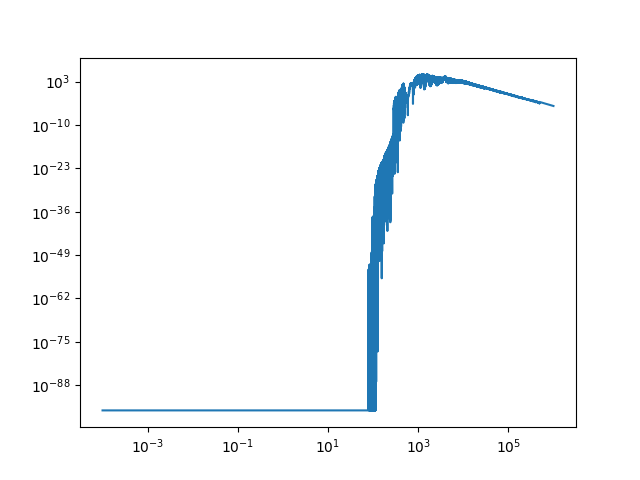

In [7]:
%matplotlib widget
fig,ax = plt.subplots(1,1)

ax.plot(data[0],data[1])

ax.set(yscale="log", xscale="log")
plt.show()